In [237]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib

import numpy as np
import matplotlib.pyplot as plt

# import theory stuff
sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

In [ ]:
from theory.models.constants import G_0_muS

V_mV = np.linspace(-1, 1, 1001, dtype="float64")

tau = 0.1
Delta_meV = 0.18
Gamma_meV = 0.1  # 1e-1
T_K = 0.0

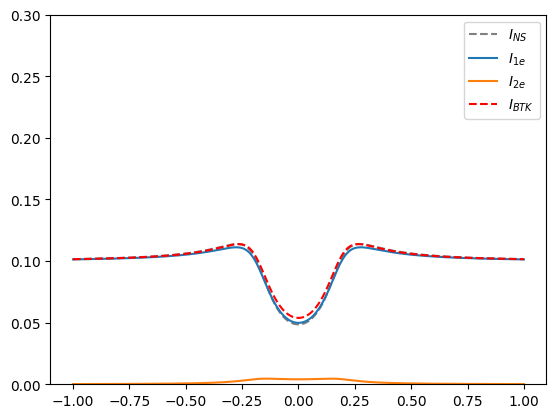

In [402]:
from theory.models.btk import get_I_nA as get_I_nA_btk
from theory.models.dynes import get_I_nA as get_I_nA_dynes

I_nA_btk = get_I_nA_btk(
    V_mV=V_mV, Delta_meV=Delta_meV, tau=tau, T_K=T_K, Gamma_meV=Gamma_meV
)
dIdV_btk = np.gradient(I_nA_btk, V_mV, axis=1) / G_0_muS

I_nA_dynes = get_I_nA_dynes(
    V_mV=V_mV, Delta_meV=(0.0, Delta_meV), tau=tau, T_K=T_K, Gamma_meV=Gamma_meV
)
dIdV_dynes = np.gradient(I_nA_dynes, V_mV) / G_0_muS

plt.plot(V_mV, dIdV_dynes, "--", color="grey", label="$I_{NS}$")
plt.plot(V_mV, dIdV_btk[1, :], label="$I_{1e}$")
plt.plot(V_mV, dIdV_btk[2, :], label="$I_{2e}$")
plt.plot(V_mV, dIdV_btk[0, :], "r--", label="$I_{BTK}$")
plt.ylim(0, 3 * tau)
plt.legend()
a = 3

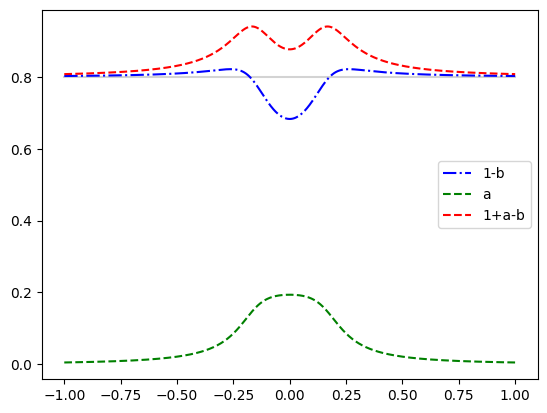

In [ ]:
from theory.models.btk import ABCD_of_E, Z_of_tau, AB_of_E
from theory.models.dynes import N_of_E

Gamma_meV = 0.1
tau = 0.8
Z = Z_of_tau(tau)
A, B, C, D = ABCD_of_E(V_mV, Delta_meV=Delta_meV, Z=Z)
N = N_of_E(E_meV=V_mV, Delta_meV=Delta_meV, Gamma_meV=Gamma_meV)

a, b = AB_of_E(V_mV, Delta_meV=Delta_meV, Z=Z, Gamma_meV=Gamma_meV)

# plt.plot(V_mV, N * tau, "-", lw=5, color="lightgrey", label="N")
# plt.plot(V_mV, 2 * A, label="2A")
# plt.plot(V_mV, B, label="B")
# plt.plot(V_mV, C + D, label="C+D")
# plt.plot(V_mV, D, label="D")
# plt.plot(V_mV, A+B+C+D, color='k', label="1")
# plt.plot(V_mV, 2 * A + C + D, "--", label="2A+C+D")
# plt.plot(V_mV, 1 +A -B, '--',label="1+A-B")
plt.plot(V_mV, np.ones_like(V_mV) * tau, color="lightgrey")
plt.plot(V_mV, np.abs(1 - b), "b-.", label="1-b")
plt.plot(V_mV, a, "g--", label="a")
plt.plot(V_mV, np.abs(1 - b) + a, "r--", label="1+a-b")
# plt.ylim(-1*tau, 5*tau)
plt.legend()

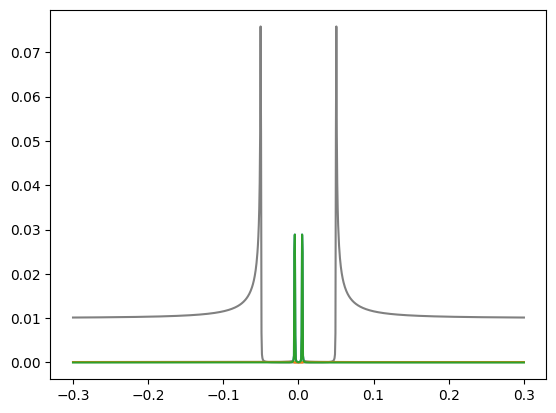

In [86]:
%matplotlib inline
plt.plot(V_mV, dIdV_dynes, 'grey')
plt.plot(V_mV, dIdV_btk[0, :])
plt.plot(V_mV, dIdV_btk[1, :])
plt.plot(V_mV, dIdV_btk[2, :])

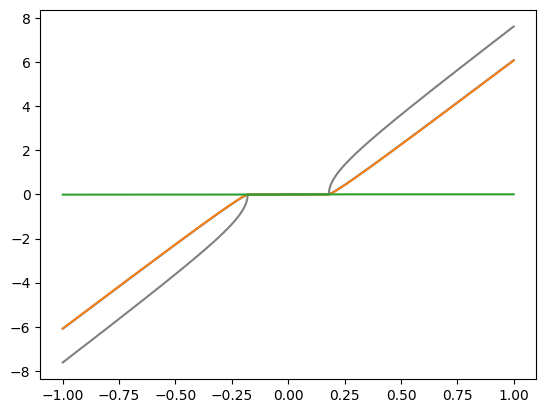

In [ ]:
plt.plot(V_mV, I_nA_dynes, "grey")
plt.plot(V_mV, I_nA_btk[0, :])
plt.plot(V_mV, I_nA_btk[1, :])
plt.plot(V_mV, I_nA_btk[2, :])